In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# https://www.kaggle.com/datasets/themrityunjaypathak/covid-cases-and-deaths-worldwide?resource=download
df = pd.read_csv('data/covid_worldwide.csv')
df

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"
...,...,...,...,...,...,...,...,...
226,227,Diamond Princess,712,13,699,0,NaN,NaN
227,228,Vatican City,29,NaN,29,0,NaN,799
228,229,Western Sahara,10,1,9,0,NaN,"626,161"
229,230,MS Zaandam,9,2,7,0,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Serial Number    231 non-null    int64 
 1   Country          231 non-null    object
 2   Total Cases      231 non-null    object
 3   Total Deaths     225 non-null    object
 4   Total Recovered  210 non-null    object
 5   Active Cases     212 non-null    object
 6   Total Test       213 non-null    object
 7   Population       228 non-null    object
dtypes: int64(1), object(7)
memory usage: 14.6+ KB


Плотность:

In [4]:
1 - df[df.isna().any(axis=1)].shape[0] / df.shape[0]

0.8441558441558441

Уникальность:

In [5]:
df.drop_duplicates().shape[0] / df.shape[0]

1.0

Точность:

In [6]:
num = 0
numeric_columns = df.columns[2:]
for row in df.iterrows():
    for column in numeric_columns:
        if isinstance(row[1][column], str) and row[1][column].find(",") != -1:
            num += 1
            break

In [7]:
1 - num / df.shape[0]

0.012987012987012991

In [8]:
for column in df.columns:
    print(column, df[column].nunique())

Serial Number 231
Country 231
Total Cases 231
Total Deaths 213
Total Recovered 210
Active Cases 181
Total Test 212
Population 228


In [9]:
df = df.drop("Serial Number", axis=1)

In [16]:
numeric_columns = df.columns[1:]
for column in numeric_columns:
    df[column] = df[column].apply(lambda x: str(x).replace(',','') if str(x) != 'nan' else x).astype(float)

<Axes: >

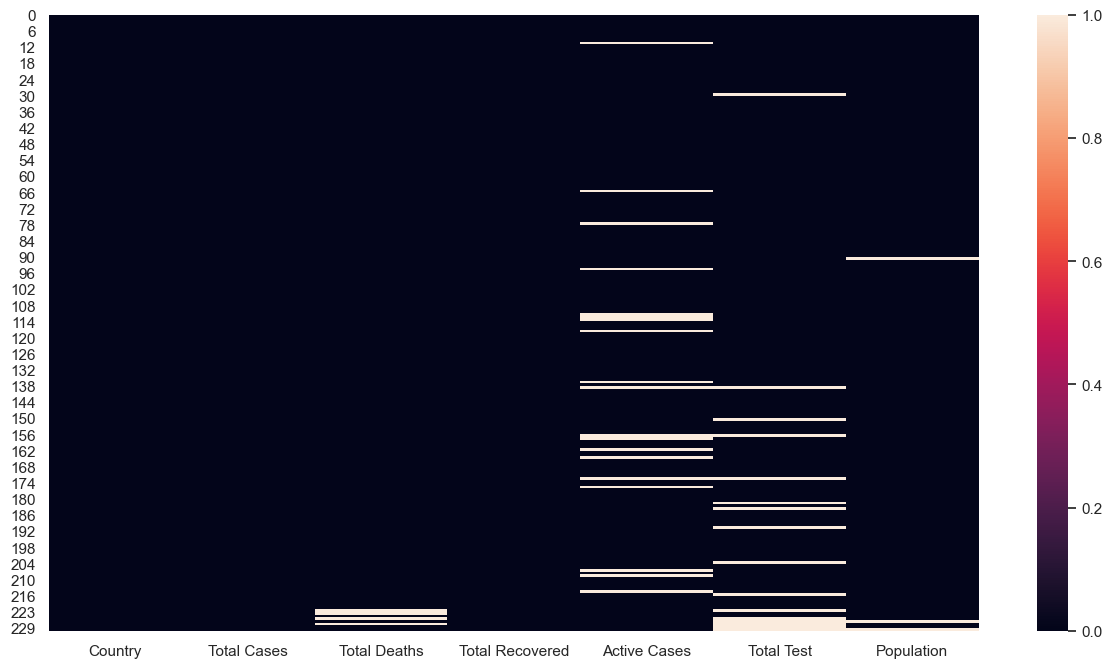

In [17]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.isnull())

In [18]:
print(df[numeric_columns].to_string())

     Total Cases  Total Deaths  Total Recovered  Active Cases    Total Test    Population
0    104196861.0     1132935.0      101322779.0     1741147.0  1.159833e+09  3.348053e+08
1     44682784.0      530740.0       44150289.0        1755.0  9.152658e+08  1.406632e+09
2     39524311.0      164233.0       39264546.0       95532.0  2.714902e+08  6.558452e+07
3     37779833.0      165711.0       37398100.0      216022.0  1.223324e+08  8.388360e+07
4     36824580.0      697074.0       35919372.0      208134.0  6.377617e+07  2.153536e+08
5     32588442.0       68399.0       21567425.0    10952618.0  9.214464e+07  1.255848e+08
6     30197066.0       33486.0       29740877.0      422703.0  1.580406e+07  5.132990e+07
7     25453789.0      186833.0       25014986.0      251970.0  2.654782e+08  6.026277e+07
8     24274361.0      204171.0       24020088.0       50102.0  5.225265e+08  6.849791e+07
9     21958696.0      395108.0       21356008.0      207580.0  2.734000e+08  1.458059e+08
10    1704

In [19]:
df = df[~df[["Total Deaths", "Total Recovered"]].isna().all(axis=1)]

In [20]:
df['Total Recovered'].fillna(method='backfill', inplace=True)

In [21]:
df["Total Deaths"] = df["Total Cases"] - df["Total Recovered"]
df.loc[df["Total Deaths"] < 0]

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population


In [22]:
print(df[numeric_columns].to_string())

     Total Cases  Total Deaths  Total Recovered  Active Cases    Total Test    Population
0    104196861.0     2874082.0      101322779.0     1741147.0  1.159833e+09  3.348053e+08
1     44682784.0      532495.0       44150289.0        1755.0  9.152658e+08  1.406632e+09
2     39524311.0      259765.0       39264546.0       95532.0  2.714902e+08  6.558452e+07
3     37779833.0      381733.0       37398100.0      216022.0  1.223324e+08  8.388360e+07
4     36824580.0      905208.0       35919372.0      208134.0  6.377617e+07  2.153536e+08
5     32588442.0    11021017.0       21567425.0    10952618.0  9.214464e+07  1.255848e+08
6     30197066.0      456189.0       29740877.0      422703.0  1.580406e+07  5.132990e+07
7     25453789.0      438803.0       25014986.0      251970.0  2.654782e+08  6.026277e+07
8     24274361.0      254273.0       24020088.0       50102.0  5.225265e+08  6.849791e+07
9     21958696.0      602688.0       21356008.0      207580.0  2.734000e+08  1.458059e+08
10    1704

In [23]:
for column in numeric_columns:
    df[column].fillna(df[column].mean(), inplace=True)

In [24]:
print(df[numeric_columns].to_string())

     Total Cases  Total Deaths  Total Recovered  Active Cases    Total Test    Population
0    104196861.0     2874082.0      101322779.0  1.741147e+06  1.159833e+09  3.348053e+08
1     44682784.0      532495.0       44150289.0  1.755000e+03  9.152658e+08  1.406632e+09
2     39524311.0      259765.0       39264546.0  9.553200e+04  2.714902e+08  6.558452e+07
3     37779833.0      381733.0       37398100.0  2.160220e+05  1.223324e+08  8.388360e+07
4     36824580.0      905208.0       35919372.0  2.081340e+05  6.377617e+07  2.153536e+08
5     32588442.0    11021017.0       21567425.0  1.095262e+07  9.214464e+07  1.255848e+08
6     30197066.0      456189.0       29740877.0  4.227030e+05  1.580406e+07  5.132990e+07
7     25453789.0      438803.0       25014986.0  2.519700e+05  2.654782e+08  6.026277e+07
8     24274361.0      254273.0       24020088.0  5.010200e+04  5.225265e+08  6.849791e+07
9     21958696.0      602688.0       21356008.0  2.075800e+05  2.734000e+08  1.458059e+08
10    1704

In [8]:
# https://www.kaggle.com/datasets/nipunarora8/most-liked-comments-on-youtube
df = pd.read_csv('data/youtube_dataset.csv')
df

,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes
0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgwV0tapZzaFxdYm1z14AaABAg,GAMIT yuvraj,The people who liked this comment is officiall...,2020-08-10T20:00:43Z,98280
1,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgyiccblP3A16aixpit4AaABAg,MrCrazy,"- Wait, it's 7B views\n- Always has been",2020-09-07T20:52:36Z,773
2,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugx7THW3EBNJlhJuwSB4AaABAg,60K Subs With 1 Video Challenge,*Teacher: What is the population of the Earth?...,2019-11-21T03:23:32Z,356081
3,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzXUsI6yrRjTKNASf94AaABAg,Srivathsa D,Let's be honest this wasn't your recommendatio...,2020-09-09T03:41:34Z,13
4,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgxCu6mywg6uqjueHQ14AaABAg,1k Subscribers Challenge Without Any Video,Types Of People:\n10% Enjoying Song \n90% Chec...,2020-09-08T09:53:24Z,122
...,...,...,...,...,...,...,...
19295,ZAYN - PILLOWTALK (Official Music Video),ZaynVEVO,UgxqlnG8nQ36eDoXKbJ4AaABAg,KineZ,Claim your “before 1 billion” certificate here,2020-07-28T18:39:38Z,5087
19296,ZAYN - PILLOWTALK (Official Music Video),ZaynVEVO,UgwZsgM-0pn9tiFxmOh4AaABAg,varun raj,This means that you are before 1 billion views.,2020-09-09T11:41:30Z,6
19297,ZAYN - PILLOWTALK (Official Music Video),ZaynVEVO,UgxeBmhoyhSILM0HPux4AaABAg,hey harry,We won't have school till 2021 \nMay God help ...,2020-09-09T10:03:04Z,5
19298,ZAYN - PILLOWTALK (Official Music Video),ZaynVEVO,Ugy6KVBjdz7Rj2yxTER4AaABAg,Jannat EXO-L,Literally saw this song from 1M -> 996M,2020-09-08T19:41:18Z,4


Плотность:

In [9]:
1 - df[df.isna().any(axis=1)].shape[0] / df.shape[0]

0.9999481865284974

In [10]:
df = df[~df.isna().any(axis=1)]

Уникальность:

In [11]:
df.drop_duplicates().shape[0] / df.shape[0]

0.9927975542774237

In [12]:
df = df.drop_duplicates()

In [13]:
1 - df[df.isna().any(axis=1)].shape[0] / df.shape[0], df.drop_duplicates().shape[0] / df.shape[0]

(1.0, 1.0)

In [16]:
sum(df.groupby(['Comment Id']).count().sort_values('Likes', ascending=False)["Video Name"] != 1)

40

In [19]:
df_group = df.groupby(['Comment Id']).count().sort_values('Likes', ascending=False)
df = df[df["Comment Id"].isin(df_group[df_group["Video Name"] == 1].index)]

In [20]:
df.head()

,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes
0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgwV0tapZzaFxdYm1z14AaABAg,GAMIT yuvraj,The people who liked this comment is officiall...,2020-08-10T20:00:43Z,98280
1,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgyiccblP3A16aixpit4AaABAg,MrCrazy,"- Wait, it's 7B views\n- Always has been",2020-09-07T20:52:36Z,773
2,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugx7THW3EBNJlhJuwSB4AaABAg,60K Subs With 1 Video Challenge,*Teacher: What is the population of the Earth?...,2019-11-21T03:23:32Z,356081
3,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzXUsI6yrRjTKNASf94AaABAg,Srivathsa D,Let's be honest this wasn't your recommendatio...,2020-09-09T03:41:34Z,13
4,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgxCu6mywg6uqjueHQ14AaABAg,1k Subscribers Challenge Without Any Video,Types Of People:\n10% Enjoying Song \n90% Chec...,2020-09-08T09:53:24Z,122


In [22]:
df["Comment"] = df["Comment"].apply(lambda x: x.replace('\n',''))

In [23]:
df.head()

,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes
0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgwV0tapZzaFxdYm1z14AaABAg,GAMIT yuvraj,The people who liked this comment is officiall...,2020-08-10T20:00:43Z,98280
1,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgyiccblP3A16aixpit4AaABAg,MrCrazy,"- Wait, it's 7B views- Always has been",2020-09-07T20:52:36Z,773
2,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugx7THW3EBNJlhJuwSB4AaABAg,60K Subs With 1 Video Challenge,*Teacher: What is the population of the Earth?...,2019-11-21T03:23:32Z,356081
3,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzXUsI6yrRjTKNASf94AaABAg,Srivathsa D,Let's be honest this wasn't your recommendatio...,2020-09-09T03:41:34Z,13
4,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgxCu6mywg6uqjueHQ14AaABAg,1k Subscribers Challenge Without Any Video,Types Of People:10% Enjoying Song 90% Checking...,2020-09-08T09:53:24Z,122
